In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [6]:
# Import data
data = pd.read_csv('housing.csv')

In [7]:
# Check NA values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#Filling the NA values by mean of indicated column
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(),inplace=True)

In [9]:
#Check NA values again
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
# Preprocessing by Label Encoder to 'ocean_proximity'

le = LabelEncoder()

data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])

In [11]:
#We get 0:4 values on 'ocean_proximity'
data['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

<AxesSubplot:>

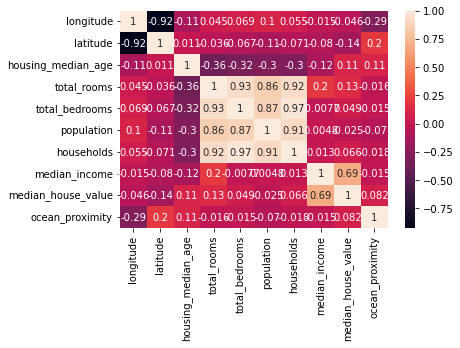

In [12]:
# Heat map(correlation)

cor = data.corr()
sns.heatmap(cor,annot=True)

In [21]:
# Split the data to X(Input) and Y(Output)

x = data.drop(['median_house_value'],axis=1)
y = data.iloc[:,-2]

In [22]:
# Train - test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [15]:
# Standard Scaling due to different sizes of values

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [28]:
# fModeling by Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
# Prediction and r2 score
prediction = lr.predict(x_test)
print(r2_score(prediction,y_test))

0.4311017164092479


In [32]:
#Random forest modeling
rfr = RandomForestRegressor()

rfr.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
# Prediction with random forest
rfr_prediction = rfr.predict(x_test)
print(r2_score(rfr_prediction,y_test))

0.7693005464937948
